In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [13]:

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
cursor.execute("DELETE FROM sales")  # Optional: Clear data if rerun

sample_data = [
    ('Laptop', 5, 70000),
    ('Mouse', 15, 500),
    ('Keyboard', 10, 1200),
    ('Monitor', 7, 15000),
    ('Laptop', 2, 70000),
    ('Mouse', 10, 500)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [14]:

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)

    product  total_qty   revenue
0  Keyboard         10   12000.0
1    Laptop          7  490000.0
2   Monitor          7  105000.0
3     Mouse         25   12500.0


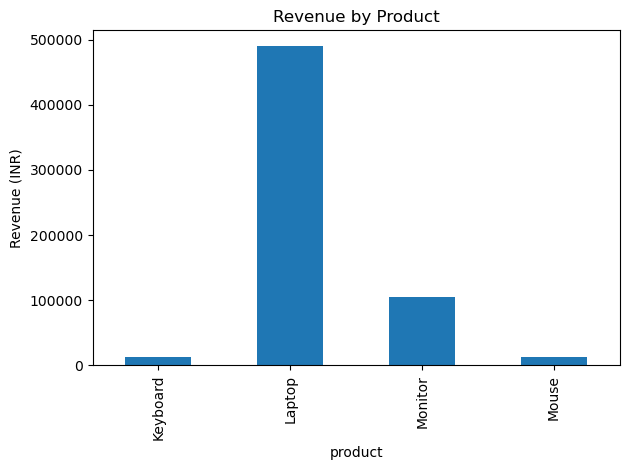

In [15]:

df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue (INR)')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [35]:
query_avg_price = """
SELECT 
    product, 
    AVG(price) AS average_price
FROM sales 
GROUP BY product
"""

# Execute the query and load into DataFrame
df_avg_price = pd.read_sql_query(query_avg_price, sqlite3.connect("sales_data.db"))
print("Average price by product:")
print(df_avg_price)




Average price by product:
    product  average_price
0  Keyboard         1200.0
1    Laptop        70000.0
2   Monitor        15000.0
3     Mouse          500.0


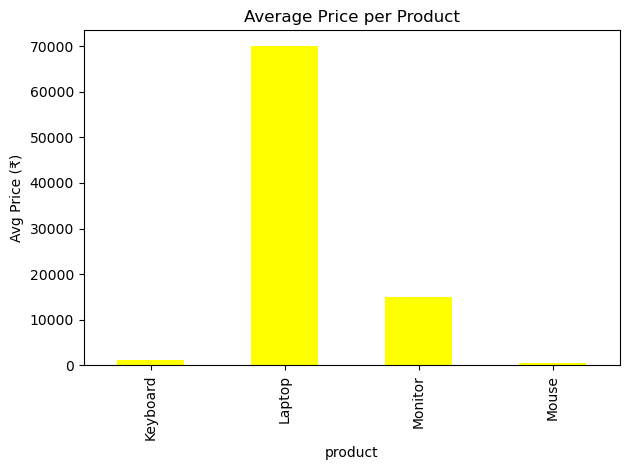

In [32]:
df_avg_price.plot(kind='bar', x='product', y='average_price', title='Average Price per Product', legend=False, color='yellow')
plt.ylabel("Avg Price (₹)")
plt.tight_layout()
plt.show()



In [34]:
query_qty = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity_sold
FROM sales 
GROUP BY product
"""

# Execute query and load results
df_qty = pd.read_sql_query(query_qty, conn)

# Display result
print(df_qty)


ProgrammingError: Cannot operate on a closed database.

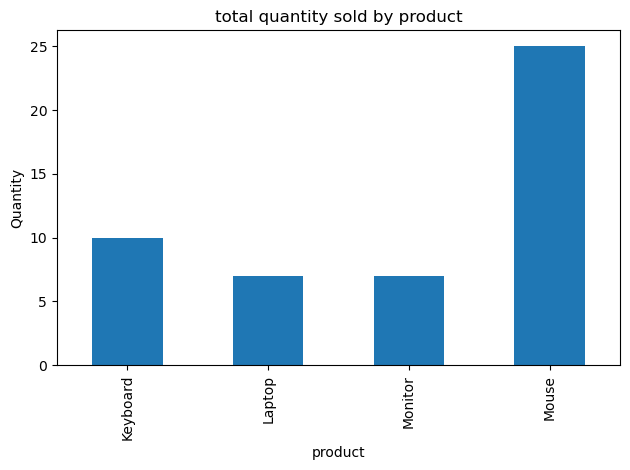

In [33]:

df_qty.plot(kind='bar', x='product', y='total_quantity_sold', title='total quantity sold by product', legend=False)
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()